I've been given a new task to study how scale dependent bias varias as a function of HOD params and 

In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np
from scipy.stats import binned_statistic, linregress

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
colors = sns.color_palette()

In [4]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [5]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.81120]}

In [6]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [7]:
cat.load(0.81120, tol = 0.01, HOD='hsabRedMagic', particles = False)#, hod_kwargs = {'sec_haloprop_key':'halo_log_nfw_conc'})#, hod_kwargs={'split': 0.5})

In [8]:
chain_fname = '/u/ki/swmclau2/des/SherlockPearceMCMC/500_walkers_5000_steps_chain_wt_alt_redmagic_z0.23_part2.npy'
chain = np.genfromtxt(chain_fname)

In [9]:
n_walkers = 500
n_params = chain.shape[1]
n_burn = 0
chain = chain[n_walkers*n_burn:, :]
print chain.shape

(2006500, 8)


In [10]:
chain.mean(axis = 0)

array([  1.23861087e+01,   1.39202848e-01,   2.92529716e-01,
         1.14343956e+01,   4.11403722e-01,  -1.32217405e-02,
         1.37773031e+01,   1.11968758e+00])

In [11]:
ordered_param_names = param_names = ['logMmin','mean_occupation_centrals_assembias_param1', 'f_c', 'logM0', 'sigma_logM',
                                     'mean_occupation_satellites_assembias_param1',     'logM1',   'alpha']

In [12]:
rbins = np.array([0.31622777, 0.44326829, 0.62134575, 0.87096359, 1.22086225, 1.7113283, 2.39883292, 3.36253386,\
                  4.71338954, 6.60693448, 9.26118728,  12.98175275, 18.19700859,  25.50742784,  35.75471605,  50.11872336])
rpoints = (rbins[1:]+rbins[:-1])/2

In [13]:
theta_bins = np.logspace(np.log10(2.5), np.log10(250), 21)/60 #binning used in buzzard mocks
tpoints = (theta_bins[1:]+theta_bins[:-1])/2

In [14]:
zbin = 1
wt_redmagic = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/buzzard2_wt_%d%d.npy'%(zbin,zbin))

In [15]:
cov = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/wt_11_cov.npy')

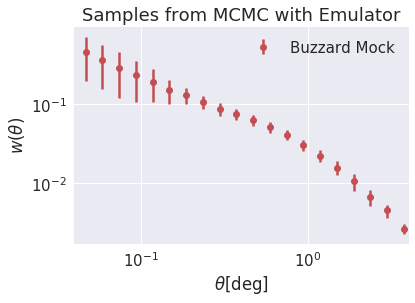

In [16]:
plt.errorbar(tpoints, wt_redmagic, yerr = np.sqrt(np.diag(cov)), fmt = 'o',
             capsize = 50, label = 'Buzzard Mock', color = colors[2])

plt.ylabel(r'$w(\theta)$')
plt.xlabel(r'$\theta \mathrm{[deg]}$')
plt.loglog();
plt.legend(loc='best')
plt.xlim([4e-2, 4])
plt.title("Samples from MCMC with Emulator")
plt.show()

In [17]:
W = 0.00275848072207

In [ ]:
wts = []
indicies = np.random.choice(chain.shape[0], size = 50, replace = False)
for i, row in enumerate(chain[indicies]):
    print i
    hod_params = dict(zip(ordered_param_names, row))
    cat.populate(hod_params)
    wt = cat.calc_wt(theta_bins, W, n_cores = 2)
    wts.append(wt)
    #plt.plot(rbc, bias, alpha = 0.1, color = 'b')

0
3612.27798402 0.0136740214085
2209.28871022 0.013675136278
1325.49731622 0.0136768978614
732.679730416

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


 0.0136797009543
401.473935296 0.0136841343786
214.589528107 0.0136911847693
118.758950805 0.0137023464153
68.8681993955 0.0137201252652
43.5036934229 0.0137483822095
29.0164858814 0.0137934496463
20.4764572593 0.0138654961925
14.6402998199 0.0139816498416
10.2492751396 0.0141702408447
7.13897252346 0.0144814827962
4.89786164633 0.0150086039402
3.25480429778 0.0159422325224
2.04674010031 0.0177414872242
1.23339885148 0.021901532761
0.697502022033 0.0400273503538
0.0 0.038166460063
1
419.521344891 0.00926968987754
313.963836765 0.00927045319052
233.468064901 0.00927165098438
169.752172163 0.00927354736017
122.017496629 0.00927655352387
84.9720043553 0.00928134024317
58.8840633003 0.00928891097978
40.5666387306 0.00930095827273
28.3043893739 0.00932011920512
19.9037003153 0.00935065847167
14.109654398 0.00939949918108
10.0097742445 0.00947824339648
6.98637483293 0.00960608923676
4.84245526033 0.00981708011257
3.2761904023 0.010174420005
2.17480873746 0.0108073461321
1.39671923818 0.01202

In [ ]:
fig = plt.figure(figsize = (15, 6))
i = 0
for wt in wts:
    if i == 0:
        plt.plot(tpoints, wt, alpha = 0.05, color = colors[0], label = 'Posterior Samples')
        i+=1
    plt.plot(tpoints, wt, alpha = 0.05, color = colors[0])
    
plt.errorbar(tpoints, wt_redmagic, yerr = np.sqrt(np.diag(cov)), fmt = 'o',
            label = 'Buzzard Mock', color = colors[2])

plt.ylabel(r'$w(\theta)$')
plt.xlabel(r'$\theta \mathrm{[deg]}$')
plt.loglog();
plt.legend(loc='best')
plt.xlim([4e-2, 4])
#plt.title("Samples from MCMC with Emulator")
plt.show()